## Problem Statement :
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA

In [2]:
wine = pd.read_csv('D:/ExcelR/Data Science/Assignments related/CSV/wine.csv')

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.shape

(178, 14)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
wine1 = wine.drop(['Type'],axis=1)
wine1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# Converting into numpy array
WINE = wine1.values
WINE

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
# Normalizing the numerical data 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
wine_norm = norm_func(WINE)
wine_norm

array([[8.39350664e-03, 9.40548971e-04, 1.36915357e-03, ...,
        5.41708585e-04, 2.25612696e-03, 6.33900242e-01],
       [7.78036396e-03, 9.82218862e-04, 1.19652116e-03, ...,
        5.47661426e-04, 1.94657920e-03, 6.24970980e-01],
       [7.75655259e-03, 1.32748367e-03, 1.51202176e-03, ...,
        5.35755743e-04, 1.80966384e-03, 7.05334341e-01],
       ...,
       [7.82203385e-03, 2.47042926e-03, 1.26795526e-03, ...,
        2.73830713e-04, 8.51256347e-04, 4.96984886e-01],
       [7.76250543e-03, 1.46439903e-03, 1.33343652e-03, ...,
        2.79783555e-04, 8.86973397e-04, 4.99961307e-01],
       [8.33397822e-03, 2.36327811e-03, 1.55369165e-03, ...,
        2.85736396e-04, 8.75067714e-04, 3.33281742e-01]])

### Performing the PCA on Normalized Data

In [11]:
pca = PCA()
pca_values = pca.fit_transform(wine_norm)
pca_values

array([[ 1.89635495e-01,  1.27939250e-02,  1.86367678e-03, ...,
         5.28219472e-05, -2.29467534e-05,  4.77801459e-05],
       [ 1.80429093e-01, -3.19353145e-03,  4.06152589e-03, ...,
         2.36793241e-05, -3.40452399e-05,  8.09154665e-06],
       [ 2.60770853e-01, -3.89155676e-03, -6.62684006e-04, ...,
         1.41540730e-04, -2.90486020e-05, -2.10779181e-05],
       ...,
       [ 5.26576900e-02,  1.11772248e-02, -1.33199385e-03, ...,
        -1.32777740e-04,  5.71761518e-05,  2.15343422e-05],
       [ 5.56330203e-02,  1.11144429e-02, -1.06460114e-03, ...,
        -1.81013009e-05, -3.10079415e-05,  7.90293761e-05],
       [-1.11284320e-01, -1.26992448e-04, -3.35175331e-03, ...,
         9.56770872e-05,  1.90015753e-05,  1.60351688e-05]])

In [12]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [13]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  ])

In [14]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02],
       [-1.68738094e-02, -1.22003373e-01, -5.19874304e-02,
        -9.38593003e-01,  2.97802484e-02,  4.04846439e-02,
         8.54433387e-02, -1.35107797e-02,  2.46593824e-02,
        -2.91398464e-01,  2.59776624e-02,  7.03239693e-02,
        -4.52868159e-03],
       [-1.41446778e-01, -1.60389543e-01,  9.77280992e-03,
         3.30965260e-01,  5.39375605e-03,  7.45846556e-02,
         1.69086724e-01, -1.08055610e-02,  5.01209524e-02,
        -8.78893693e-01,  6.00349446e

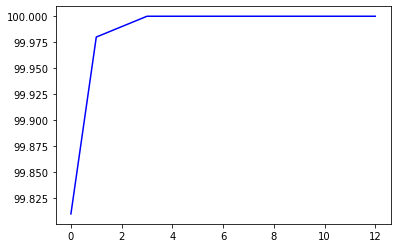

In [15]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="blue")

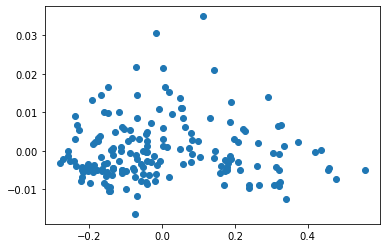

In [16]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y)

In [17]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), wine[['Type']]], axis = 1)
finalDf

,pc1,pc2,pc3,Type
0,0.189635,0.012794,0.001864,1
1,0.180429,-0.003194,0.004062,1
2,0.260771,-0.003892,-0.000663,1
3,0.436486,0.000115,-0.000546,1
4,-0.006888,0.011007,-0.000330,1
...,...,...,...,...
173,-0.004155,-0.002703,-0.001473,3
174,0.001864,0.001390,-0.002566,3
175,0.052658,0.011177,-0.001332,3
176,0.055633,0.011114,-0.001065,3


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

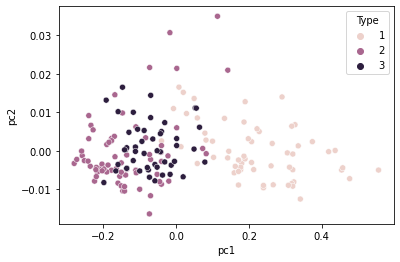

In [18]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')

### Let's perform Clustering on PC1, PC2 & PC3

### 1) Hierarchical Clustering

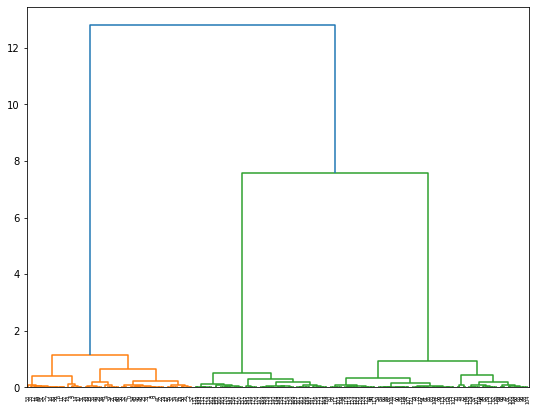

In [19]:
# creating the dendrogram
plt.figure(figsize=(9, 7))  
dendrogram = sch.dendrogram(sch.linkage(finalDf, method='ward'))

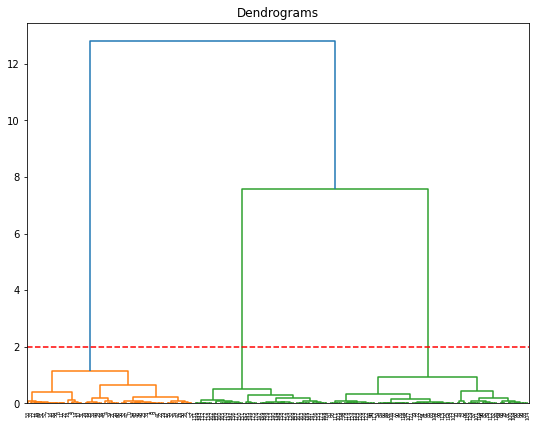

In [20]:
plt.figure(figsize=(9, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(finalDf, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')
plt.show()

    Looking at the plot we understand that we are getting 3 clusters by Hierarchical Clustering

### 2) K-Means Clustering

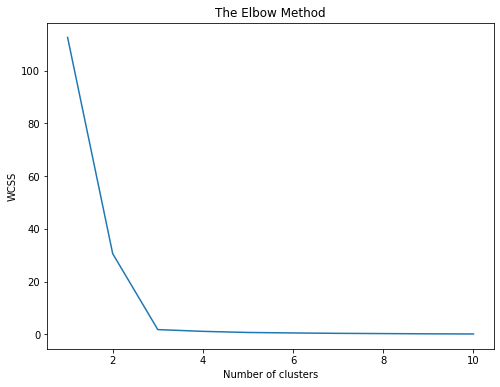

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 200)
    kmeans.fit(finalDf)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6)) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

    Looking at the plot above we can clearly see the optimum number of cluster are 3 by Elbow / K-Means clustering method 
    Let's confirm the same by The Silhouette score's method 

In [22]:
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(finalDf).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(finalDf,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.7046376244196593
Silhouette score for k(clusters) = 3 is 0.8906887433929628
Silhouette score for k(clusters) = 4 is 0.7934893991312632
Silhouette score for k(clusters) = 5 is 0.6822063035193946
Silhouette score for k(clusters) = 6 is 0.6914427573862977
Silhouette score for k(clusters) = 7 is 0.5852242596504938
Silhouette score for k(clusters) = 8 is 0.5991039010559513
Silhouette score for k(clusters) = 9 is 0.6002899535946985
Silhouette score for k(clusters) = 10 is 0.5808685430101843
Silhouette score for k(clusters) = 11 is 0.5854630977632372


    The Silhouette score is high (0.89) for the no. of cluster 3 hence we can say even by The Silhouette score's method we get optimum no. of clusters as 3 for Wine dataset. 

In [24]:
model=KMeans(n_clusters=3) 
model.fit(finalDf)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [25]:
km = pd.Series(model.labels_) 
wine['kclust']= km 
wine.iloc[:,1:7].groupby(wine.kclust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols
kclust,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750


Text(0.5, 0.98, 'Relative comparison of people in respective clusters')

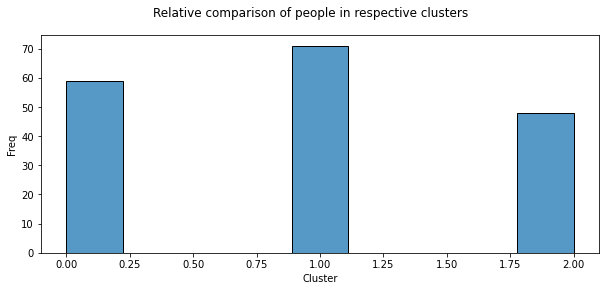

In [26]:
plt.figure(figsize=(10,4))
sns.histplot (x='kclust', data=wine)
plt.xlabel('Cluster')
plt.ylabel('Freq')
plt.suptitle('Relative comparison of people in respective clusters')

### Now let's check the Optimum no. of clusters for original dataset

### 1) Hierarchical Clustering 

In [27]:
wine_norm1 = norm_func(wine1)

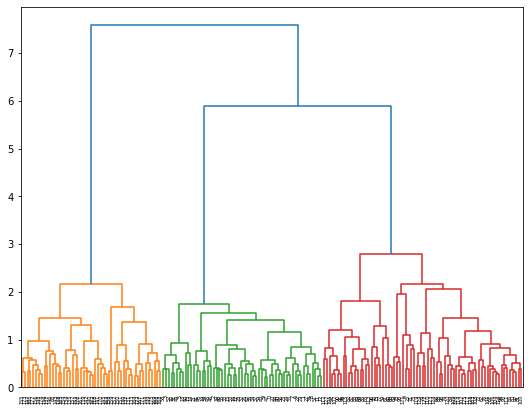

In [28]:
# creating dendrogram
plt.figure(figsize=(9, 7))  
dendrogram = sch.dendrogram(sch.linkage(wine_norm1, method='ward'))

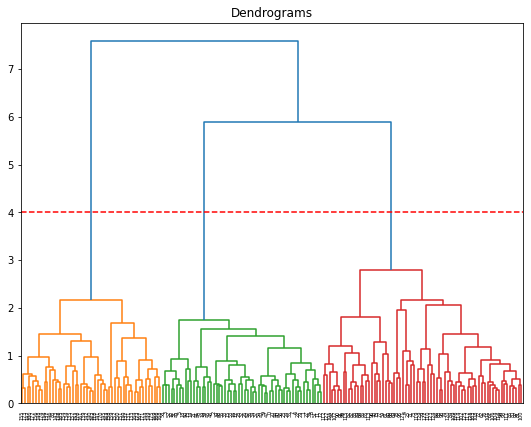

In [29]:
plt.figure(figsize=(9, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(wine_norm1, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')
plt.show()

    As per the plot above we can see the optimum no. of clusters for original dataset is 3

### 2) K-Means Clustering

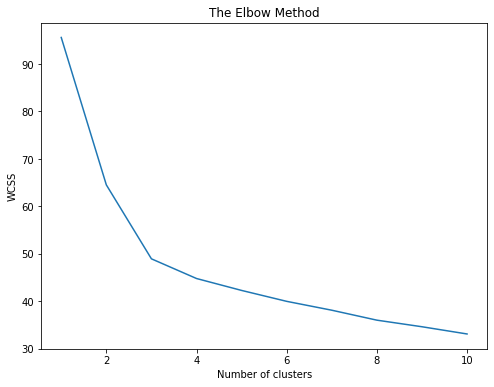

In [30]:
wcss1 = []
for k in range(1, 11):
    kmeans1 = KMeans(n_clusters = k, init = 'k-means++', random_state = 200)
    kmeans1.fit(wine_norm1)
    wcss1.append(kmeans1.inertia_)
    
plt.figure(figsize=(8, 6)) 
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(wine_norm1).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(wine_norm1,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.29872218159747743
Silhouette score for k(clusters) = 3 is 0.30134632735032324
Silhouette score for k(clusters) = 4 is 0.25975014122369366
Silhouette score for k(clusters) = 5 is 0.24103548914472728
Silhouette score for k(clusters) = 6 is 0.2001319992999053
Silhouette score for k(clusters) = 7 is 0.13262302760860342
Silhouette score for k(clusters) = 8 is 0.1493889274699824
Silhouette score for k(clusters) = 9 is 0.13953165088987174
Silhouette score for k(clusters) = 10 is 0.141450498548086
Silhouette score for k(clusters) = 11 is 0.14388798417780793
Silhouette score for k(clusters) = 12 is 0.14473079778938786


    So the highest Silhouette score is for no. of clusters 3 and also the Elbow plot shows the optimum no. of clusters as 3
### hence here we understand that the Optimum no. of clusters of first 3 principal component scores and the original data set are same => 3